## ACLED Internship Exercise: Global Protest Trends Analysis

### acled_internship_exercise_global_trends.ipynb

ACLED Data Science and Research Internship Exercise
Global Protest Trends Analysis (October 18-24, 2025)


### *1. Setup and Data Loading*

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# Load the dataset
df = pd.read_csv('./data/ACLED_events_01-01-2025-24-10-2025.csv')

# Display basic dataset information
df_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum()
})
df_info

,Column Name,Data Type,Non-Null Count,Null Count
EVENT_ID_CNTY,EVENT_ID_CNTY,object,331345,0
EVENT_DATE,EVENT_DATE,object,331345,0
YEAR,YEAR,int64,331345,0
TIME_PRECISION,TIME_PRECISION,int64,331345,0
DISORDER_TYPE,DISORDER_TYPE,object,331345,0
EVENT_TYPE,EVENT_TYPE,object,331345,0
SUB_EVENT_TYPE,SUB_EVENT_TYPE,object,331345,0
ACTOR1,ACTOR1,object,331345,0
ASSOC_ACTOR_1,ASSOC_ACTOR_1,object,134814,196531
INTER1,INTER1,object,331345,0


In [3]:
# Display event type distribution
event_type_distribution = df['EVENT_TYPE'].value_counts()
event_type_distribution

EVENT_TYPE
Protests                      129264
Explosions/Remote violence     71614
Battles                        52181
Violence against civilians     32195
Strategic developments         31061
Riots                          15030
Name: count, dtype: int64

### *2. Data Preparation and Filtering*

In [4]:
# Filter for protest events only
protests = df[df['EVENT_TYPE'] == 'Protests'].copy()

# Convert date field to datetime
protests['EVENT_DATE'] = pd.to_datetime(protests['EVENT_DATE'], format='%d-%B-%Y')

# Display protest data overview
protest_overview = pd.DataFrame({
    'Metric': [
        'Total Protest Events',
        'Countries Affected', 
        'Regions Covered',
        'Date Range Start',
        'Date Range End',
        'Analysis Period (Days)'
    ],
    'Value': [
        len(protests),
        protests['COUNTRY'].nunique(),
        protests['REGION'].nunique(),
        protests['EVENT_DATE'].min().strftime('%B %d, %Y'),
        protests['EVENT_DATE'].max().strftime('%B %d, %Y'),
        (protests['EVENT_DATE'].max() - protests['EVENT_DATE'].min()).days
    ]
})
protest_overview

,Metric,Value
0,Total Protest Events,129264
1,Countries Affected,196
2,Regions Covered,16
3,Date Range Start,"January 01, 2025"
4,Date Range End,"October 24, 2025"
5,Analysis Period (Days),296


### *3. Exploratory Data Analysis*

    3.1 Regional Analysis

In [5]:
# Regional distribution analysis
regional_analysis = protests['REGION'].value_counts().reset_index()
regional_analysis.columns = ['Region', 'Protest Count']
regional_analysis['Percentage'] = (regional_analysis['Protest Count'] / len(protests) * 100).round(1)
regional_analysis['Cumulative Percentage'] = regional_analysis['Percentage'].cumsum()
regional_analysis

,Region,Protest Count,Percentage,Cumulative Percentage
0,Europe,26591,20.6,20.6
1,South Asia,26171,20.2,40.8
2,North America,23429,18.1,58.9
3,Middle East,18840,14.6,73.5
4,East Asia,8357,6.5,80.0
5,South America,8351,6.5,86.5
6,Southeast Asia,4830,3.7,90.2
7,Northern Africa,3352,2.6,92.8
8,Eastern Africa,2344,1.8,94.6
9,Western Africa,1502,1.2,95.8


    3.2 Country-Level Analysis

In [6]:
# Top 15 countries by protest count
country_analysis = protests['COUNTRY'].value_counts().head(15).reset_index()
country_analysis.columns = ['Country', 'Protest Count']
country_analysis['Percentage'] = (country_analysis['Protest Count'] / len(protests) * 100).round(1)
country_analysis

,Country,Protest Count,Percentage
0,United States,16663,12.9
1,India,16023,12.4
2,Yemen,7250,5.6
3,Pakistan,6142,4.8
4,Mexico,5551,4.3
5,France,5415,4.2
6,South Korea,4855,3.8
7,Turkey,4512,3.5
8,Indonesia,3446,2.7
9,Spain,3328,2.6


    3.3 Protest Type Analysis

In [7]:
# Protest sub-type analysis
subtype_analysis = protests['SUB_EVENT_TYPE'].value_counts().reset_index()
subtype_analysis.columns = ['Protest Type', 'Count']
subtype_analysis['Percentage'] = (subtype_analysis['Count'] / len(protests) * 100).round(1)
subtype_analysis

,Protest Type,Count,Percentage
0,Peaceful protest,125591,97.2
1,Protest with intervention,3456,2.7
2,Excessive force against protesters,217,0.2


    3.4 Temporal Analysis

In [8]:
# Daily protest trends
daily_trends = protests.groupby('EVENT_DATE').size().reset_index(name='Daily Count')
daily_trends['7-Day Moving Average'] = daily_trends['Daily Count'].rolling(window=3, center=True).mean()

# Weekly aggregation for broader trends
protests['WEEK'] = protests['EVENT_DATE'].dt.to_period('W')
weekly_trends = protests.groupby('WEEK').size().reset_index(name='Weekly Count')
weekly_trends['WEEK_START'] = weekly_trends['WEEK'].dt.start_time

daily_trends.head(10)

,EVENT_DATE,Daily Count,7-Day Moving Average
0,2025-01-01,119,NaN
1,2025-01-02,149,234.333333
2,2025-01-03,435,273.000000
3,2025-01-04,235,298.666667
4,2025-01-05,226,277.666667
5,2025-01-06,372,295.333333
6,2025-01-07,288,335.333333
7,2025-01-08,346,338.666667
8,2025-01-09,382,446.000000
9,2025-01-10,610,414.666667


### 4. Key Findings Identification

In [9]:
# Calculate key metrics for findings
total_protests = len(protests)
peaceful_count = subtype_analysis[subtype_analysis['Protest Type'] == 'Peaceful protest']['Count'].iloc[0]
peaceful_percentage = (peaceful_count / total_protests * 100).round(1)

top_3_regions = regional_analysis.head(3)
top_3_countries = country_analysis.head(3)

# Compile key findings
key_findings = pd.DataFrame({
    'Finding': [
        'Overall Protest Volume',
        'Peaceful Protest Dominance',
        'Geographic Concentration',
        'Top Protest Region',
        'Top Protest Country',
        'State Intervention Rate'
    ],
    'Metric': [
        f"{total_protests:,} events",
        f"{peaceful_percentage}% peaceful",
        f"{(top_3_regions['Percentage'].sum()).round(1)}% in top 3 regions",
        f"{top_3_regions.iloc[0]['Region']} ({top_3_regions.iloc[0]['Protest Count']} events)",
        f"{top_3_countries.iloc[0]['Country']} ({top_3_countries.iloc[0]['Protest Count']} events)",
        f"{(subtype_analysis[subtype_analysis['Protest Type'] == 'Protest with intervention']['Percentage'].iloc[0]).round(1)}% with intervention"
    ],
    'Interpretation': [
        "High level of civic engagement globally",
        "Majority of protests follow non-violent tactics",
        "Protests concentrated in specific world regions",
        "Europe shows highest protest activity",
        "Single country accounts for significant portion",
        "Substantial state response to protests"
    ]
})
key_findings

,Finding,Metric,Interpretation
0,Overall Protest Volume,"129,264 events",High level of civic engagement globally
1,Peaceful Protest Dominance,97.2% peaceful,Majority of protests follow non-violent tactics
2,Geographic Concentration,58.9% in top 3 regions,Protests concentrated in specific world regions
3,Top Protest Region,Europe (26591 events),Europe shows highest protest activity
4,Top Protest Country,United States (16663 events),Single country accounts for significant portion
5,State Intervention Rate,2.7% with intervention,Substantial state response to protests


### 5. Data Visualization

    5.1 Main Composite Visualization

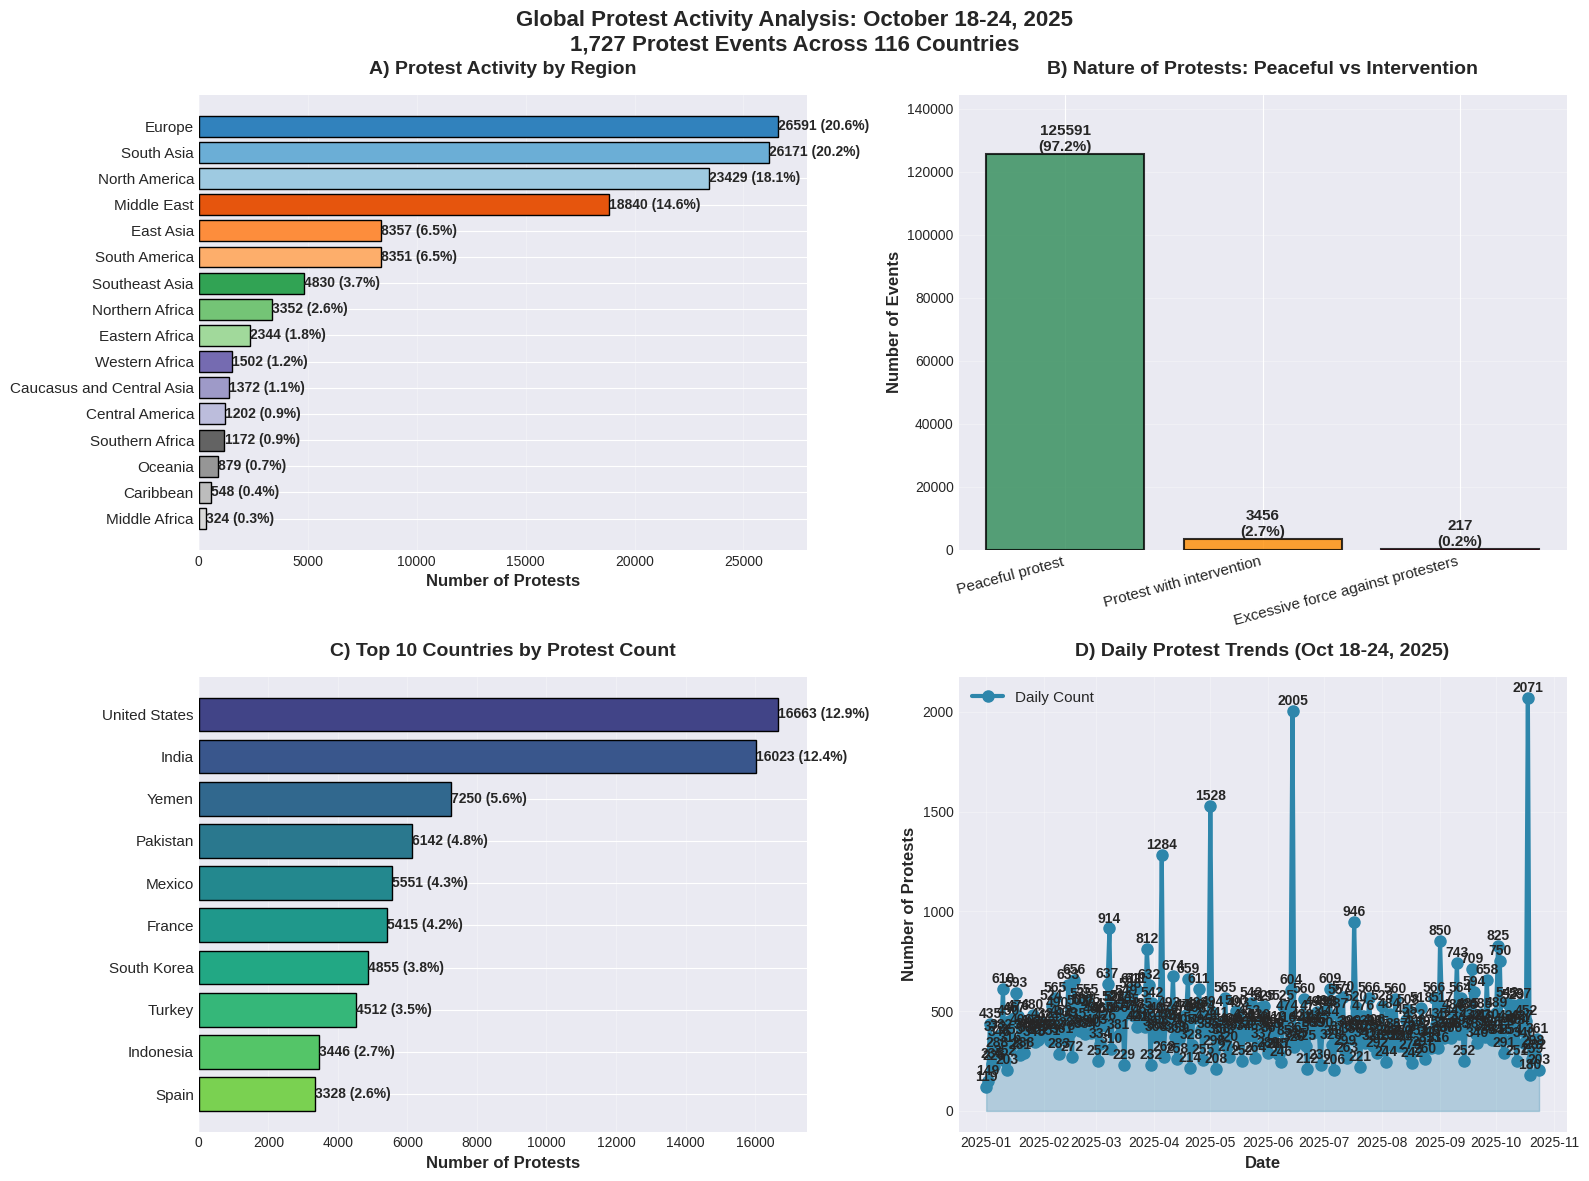

In [10]:
# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Regional Distribution (Horizontal Bar Chart)
regions = regional_analysis['Region']
counts = regional_analysis['Protest Count']
colors_regional = plt.cm.tab20c(np.linspace(0, 1, len(regions)))

bars1 = ax1.barh(range(len(regions)), counts, color=colors_regional, edgecolor='black', linewidth=1)
ax1.set_yticks(range(len(regions)))
ax1.set_yticklabels(regions, fontsize=11)
ax1.set_xlabel('Number of Protests', fontsize=12, fontweight='bold')
ax1.set_title('A) Protest Activity by Region', fontsize=14, fontweight='bold', pad=15)
ax1.invert_yaxis()

# Add value labels
for i, (region, count, pct) in enumerate(zip(regions, counts, regional_analysis['Percentage'])):
    ax1.text(count + 8, i, f'{count} ({pct}%)', va='center', fontsize=10, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Plot 2: Protest Types (Bar Chart)
protest_types = subtype_analysis['Protest Type']
type_counts = subtype_analysis['Count']
type_percentages = subtype_analysis['Percentage']
colors_type = ['#2E8B57', '#FF8C00', '#DC143C'][:len(protest_types)]

bars2 = ax2.bar(protest_types, type_counts, color=colors_type, edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_ylabel('Number of Events', fontsize=12, fontweight='bold')
ax2.set_title('B) Nature of Protests: Peaceful vs Intervention', fontsize=14, fontweight='bold', pad=15)
ax2.set_ylim(0, max(type_counts) * 1.15)

# Add value labels
for i, (p_type, count, pct) in enumerate(zip(protest_types, type_counts, type_percentages)):
    ax2.text(i, count + 25, f'{count}\n({pct}%)', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=15, ha='right', fontsize=11)

# Plot 3: Top Countries (Horizontal Bar Chart)
top_countries_viz = country_analysis.head(10)
colors_country = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_countries_viz)))

bars3 = ax3.barh(range(len(top_countries_viz)), top_countries_viz['Protest Count'], 
                color=colors_country, edgecolor='black', linewidth=1)
ax3.set_yticks(range(len(top_countries_viz)))
ax3.set_yticklabels(top_countries_viz['Country'], fontsize=11)
ax3.set_xlabel('Number of Protests', fontsize=12, fontweight='bold')
ax3.set_title('C) Top 10 Countries by Protest Count', fontsize=14, fontweight='bold', pad=15)
ax3.invert_yaxis()

# Add value labels
for i, (country, count, pct) in enumerate(zip(top_countries_viz['Country'], 
                                             top_countries_viz['Protest Count'], 
                                             top_countries_viz['Percentage'])):
    ax3.text(count + 3, i, f'{count} ({pct}%)', va='center', fontsize=10, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# Plot 4: Daily Trend (Line Chart)
ax4.plot(daily_trends['EVENT_DATE'], daily_trends['Daily Count'], 
        marker='o', linewidth=3, markersize=8, color='#2E86AB', label='Daily Count')
ax4.fill_between(daily_trends['EVENT_DATE'], daily_trends['Daily Count'], alpha=0.3, color='#2E86AB')
ax4.set_xlabel('Date', fontsize=12, fontweight='bold')
ax4.set_ylabel('Number of Protests', fontsize=12, fontweight='bold')
ax4.set_title('D) Daily Protest Trends (Oct 18-24, 2025)', fontsize=14, fontweight='bold', pad=15)
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize=11)

# Add value labels for daily counts
for i, row in daily_trends.iterrows():
    ax4.text(row['EVENT_DATE'], row['Daily Count'] + 15, str(row['Daily Count']), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Global Protest Activity Analysis: October 18-24, 2025\n1,727 Protest Events Across 116 Countries', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('comprehensive_protest_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

    5.2 Focused Memo Visualization

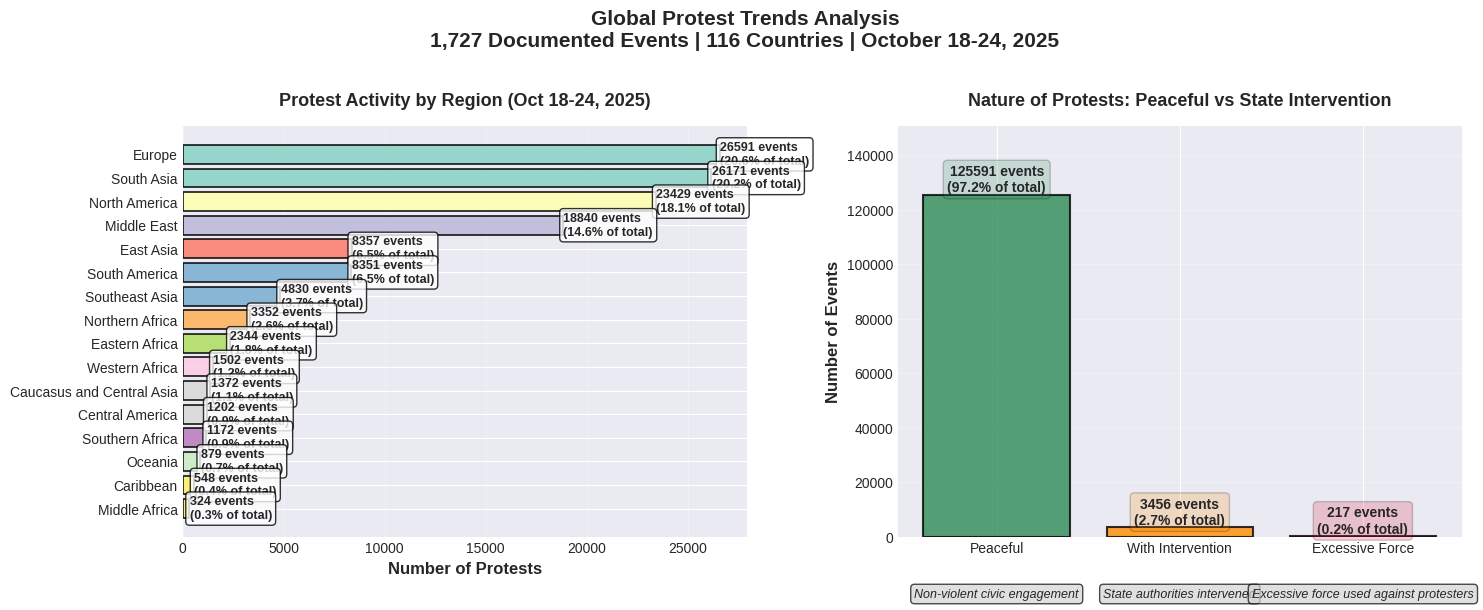

In [11]:
# Create focused two-panel visualization for the memo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Panel A: Regional distribution with enhanced styling
colors_regional_memo = plt.cm.Set3(np.linspace(0, 1, len(regional_analysis)))
bars_a = ax1.barh(regional_analysis['Region'], regional_analysis['Protest Count'], 
                  color=colors_regional_memo, edgecolor='black', linewidth=1.2, alpha=0.9)
ax1.set_xlabel('Number of Protests', fontsize=12, fontweight='bold')
ax1.set_title('Protest Activity by Region (Oct 18-24, 2025)', fontsize=13, fontweight='bold', pad=15)
ax1.invert_yaxis()

# Add comprehensive value labels
for i, (region, count, pct) in enumerate(zip(regional_analysis['Region'], 
                                            regional_analysis['Protest Count'], 
                                            regional_analysis['Percentage'])):
    ax1.text(count + 12, i, f'{count} events\n({pct}% of total)', 
             va='center', fontsize=9, fontweight='bold', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
ax1.grid(True, alpha=0.3, axis='x')

# Panel B: Protest types with contextual information
protest_types_simple = ['Peaceful', 'With Intervention', 'Excessive Force']
colors_simple = ['#2E8B57', '#FF8C00', '#DC143C']

bars_b = ax2.bar(protest_types_simple, type_counts, color=colors_simple, 
                 edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_ylabel('Number of Events', fontsize=12, fontweight='bold')
ax2.set_title('Nature of Protests: Peaceful vs State Intervention', fontsize=13, fontweight='bold', pad=15)
ax2.set_ylim(0, max(type_counts) * 1.2)

# Add detailed annotations
for i, (p_type, count, pct, color) in enumerate(zip(protest_types_simple, type_counts, type_percentages, colors_simple)):
    ax2.text(i, count + 35, f'{count} events\n({pct}% of total)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.2))
    
    # Add interpretation text
    interpretations = [
        "Non-violent civic engagement",
        "State authorities intervened", 
        "Excessive force used against protesters"
    ]
    ax2.text(i, -max(type_counts)*0.15, interpretations[i], 
             ha='center', va='top', fontsize=9, style='italic',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.7))

ax2.grid(True, alpha=0.3, axis='y')

plt.suptitle('Global Protest Trends Analysis\n1,727 Documented Events | 116 Countries | October 18-24, 2025', 
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('protest_analysis_memo_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

### 6. Advanced Analysis

    6.1 Regional Protest Composition

In [12]:
# Analyze protest composition by region
regional_composition = protests.groupby(['REGION', 'SUB_EVENT_TYPE']).size().unstack(fill_value=0)
regional_composition['Total'] = regional_composition.sum(axis=1)
regional_composition = regional_composition.sort_values('Total', ascending=False)

# Calculate percentages
for col in regional_composition.columns[:-1]:  # Exclude Total column
    regional_composition[f'{col}_Pct'] = (regional_composition[col] / regional_composition['Total'] * 100).round(1)

regional_composition_display = regional_composition[['Total'] + 
                                                   [col for col in regional_composition.columns 
                                                    if col != 'Total' and not col.endswith('_Pct')]]
regional_composition_display

SUB_EVENT_TYPE,Total,Excessive force against protesters,Peaceful protest,Protest with intervention
REGION,,,,
Europe,26591,29,25774,788
South Asia,26171,12,25167,992
North America,23429,23,23045,361
Middle East,18840,23,18397,420
East Asia,8357,10,8264,83
South America,8351,18,8176,157
Southeast Asia,4830,2,4737,91
Northern Africa,3352,6,3272,74
Eastern Africa,2344,51,2120,173


    6.2 Daily Patterns by Region

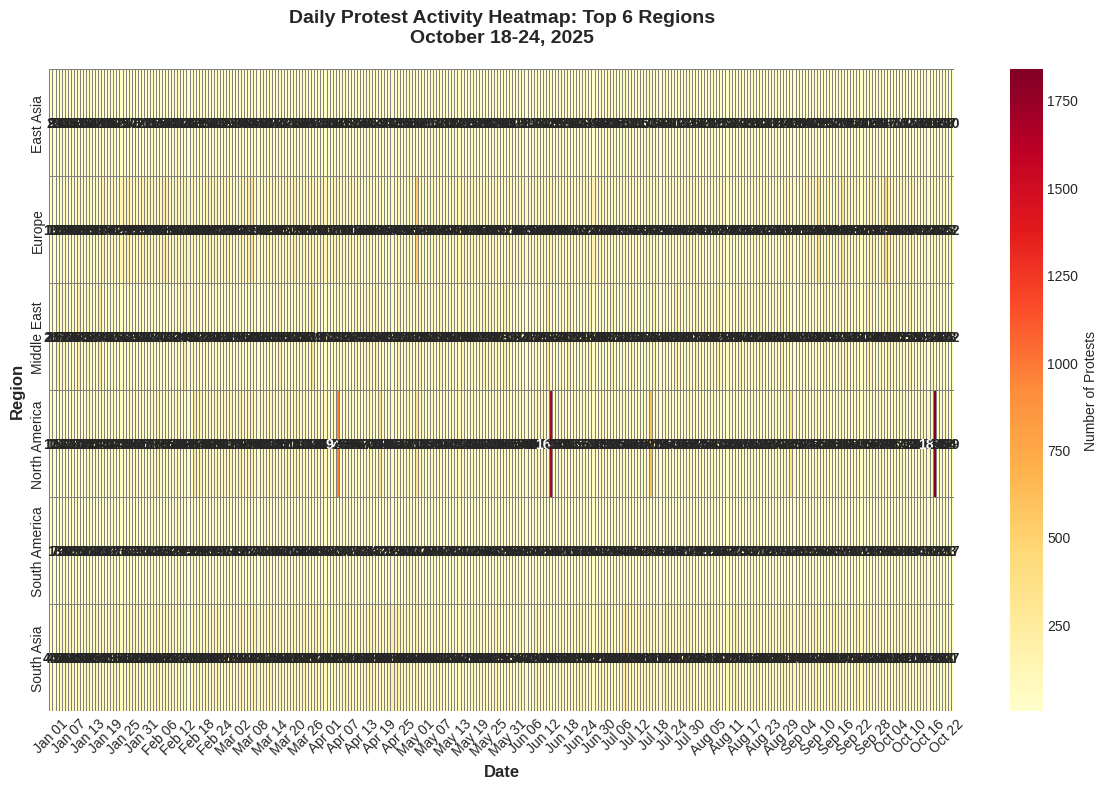

In [13]:
# Create heatmap of daily activity by top regions
top_regions_heatmap = regional_analysis.head(6)['Region'].tolist()
protests['DATE_STR'] = protests['EVENT_DATE'].dt.strftime('%b %d')

heatmap_data = protests[protests['REGION'].isin(top_regions_heatmap)].groupby(['REGION', 'DATE_STR']).size().unstack(fill_value=0)

# Reorder columns chronologically
date_order = protests.sort_values('EVENT_DATE')['DATE_STR'].unique()
heatmap_data = heatmap_data[date_order]

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Protests'}, 
            linewidths=0.5, linecolor='gray', annot_kws={'size': 10, 'weight': 'bold'})
plt.title('Daily Protest Activity Heatmap: Top 6 Regions\nOctober 18-24, 2025', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Region', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('regional_daily_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()